In [10]:
import pandas as pd
import numpy as np 


In [11]:
data = pd.read_csv("movie.csv")
data

,user_id,movie_id,movie_name,genre,timestamp,watched_duration_pct,liked,disliked,watch_later,shared,...,language,user_rating,age_group,safety_flag,data_source,mood,search_query,search_keywords,session_id,tags
0,c5fa3f7a-b0a4-4684-99d7-8a3b00241795,def85dab-ef16-428c-9625-91e1d5c05d2f,Agent every,Sci-Fi,2024-11-03 00:23:11,20.02,False,False,False,False,...,French,NaN,18-25,True,synthetic_v1,exciting,Quality throughout beautiful,"['quality', 'throughout', 'beautiful']",a0a904d3-234d-4510-8f18-03128cdbbdc0,"['Horror', 'mysterious']"
1,0af83eb4-1884-448c-832e-32d9dc2ae023,21d00494-71db-4f81-8bed-918893dab8a3,All behavior discussion,Romance,2025-03-30 03:07:58,64.18,False,False,False,False,...,English,NaN,26-35,True,synthetic_v1,funny,Current practice nation determine operation speak,"['current', 'practice', 'nation', 'determine',...",e8371aa2-56a9-4b97-abd7-da1036715d9a,"['Sci-Fi', 'Romance', 'Drama']"
2,718d4cb8-8b1f-451a-8aef-e412e91a7333,57064a20-2abf-428a-becf-5dfcdb77e2e7,Song,Comedy,2025-06-17 06:41:29,96.15,True,False,True,True,...,English,3.9,60+,True,synthetic_v1,exciting,Future choice whatever from behavior,"['future', 'choice', 'whatever', 'from', 'beha...",1247074d-90ef-40a5-ae99-d551f7138bc9,"['Comedy', 'romantic', 'Romance']"
3,26e1a02b-eec7-48b9-93fc-c0bf4940b066,d7eb6835-7796-4036-9caa-eb9eb78ac441,Grow gas,Thriller,2024-11-19 01:25:29,66.58,False,False,False,False,...,Spanish,NaN,18-25,True,synthetic_v1,mysterious,Role movie win,"['role', 'movie', 'win']",51b28aee-7e7e-4ccf-bce1-1471487797ee,"['mysterious', 'Comedy']"
4,0668938b-439a-4e22-a650-a42177fa1d35,e313d0ad-70fc-45f2-bccc-2a5ebbfacf86,Bad fall pick,Horror,2025-07-18 04:55:12,35.02,False,False,False,False,...,English,NaN,60+,True,synthetic_v1,funny,Officer relate animal direction eye,"['officer', 'relate', 'animal', 'direction', '...",9a46e3ac-5339-4af5-b614-1f16592bc49a,"['romantic', 'inspiring']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,48fcaf97-abac-4de3-a783-780c45256b99,efd80b26-7257-406d-b0c5-aef68136b913,Mother every,Action,2025-07-17 02:20:33,11.93,False,False,False,False,...,Hindi,NaN,26-35,True,synthetic_v1,chill,Hot big safe they environmental,"['hot', 'big', 'safe', 'they', 'environmental']",6042b8bc-9169-4fba-b374-84760bee5dc3,"['Sci-Fi', 'chill']"
996,1ee1eeec-7b3e-4eab-9758-c7c88a701524,71943a4d-bc4e-42fd-aac5-8e8f1a911aa2,Commercial data,Drama,2025-04-12 16:14:33,62.51,False,False,False,False,...,Hindi,NaN,26-35,True,synthetic_v1,dark,Explain about continue traditional performance...,"['explain', 'about', 'continue', 'traditional'...",51e843be-3952-46af-b2cd-4f58d2eed7cf,"['romantic', 'chill']"
997,541400c1-1101-4c6d-aa6d-1919e88b7edc,d367b3d4-8812-4ad2-8f2e-3b10a9de9a1c,Color race,Horror,2024-10-12 01:09:35,24.25,False,False,False,False,...,Hindi,NaN,46-60,True,synthetic_v1,exciting,Tonight center actually listen free,"['tonight', 'center', 'actually', 'listen', 'f...",41050d7e-d392-4f5a-89a7-1202bbad4dc2,"['Drama', 'Thriller']"
998,ad3702a7-2c9d-4743-8b79-981bb2f0b505,b8ffed3b-f7b7-48ee-ac30-6b1d65c4120b,Window thing,Horror,2024-10-13 15:11:06,44.14,False,True,True,False,...,English,NaN,46-60,True,synthetic_v1,funny,Order wide on,"['order', 'wide', 'on']",461d684d-dca5-4308-94e2-5269059acd37,"['Sci-Fi', 'mysterious', 'Comedy', 'funny']"


# Sample random sampling

In [12]:
import random

In [13]:
def SRS(data,n):
    sample=[]
    used_indices=set()
    
    while(len(sample)<n):
        idx = random.randint(0 , len(data)-1)
        if idx not in used_indices:
            sample.append(data.iloc[idx])       
            used_indices.add(idx)
            
    return sample

In [14]:
Simple_random = SRS(data, 10)
print(pd.DataFrame(Simple_random))


                                  user_id  \
693  98fedee1-e940-4e79-9b67-3e6d6afa7ba9   
926  c52f54eb-2b7f-473b-923e-465c25dcf8b2   
167  ef6de033-aedd-4dc7-9266-fc81de805e95   
842  be38790d-9d7c-4546-9bbf-a7b0928760b6   
479  c5509673-9b2d-46b6-9989-c78a655e2d36   
624  4043d58d-054f-4501-8b87-b64935f54395   
930  d33d2e22-631b-4dd7-8395-41cd9cb8bd1a   
948  f3d04557-8d5b-4218-962d-2209466977e5   
252  eef33e11-837b-4f18-a6e6-823bc70ca896   
221  df505750-82b0-4517-ba19-237291c6416d   

                                 movie_id                 movie_name  \
693  888d2712-feb6-4bbd-86a9-bfddce3ece19              American game   
926  653906fa-024b-4108-9040-49365b79b6a2         Civil how interest   
167  7a601156-101a-406f-8155-3ceee879042d         American tell ball   
842  e5792ee9-4f07-40b5-94af-c2b5183e07e5              The use short   
479  21edd0f3-60b9-4ae2-9b70-8387336171ed  Standard believe politics   
624  f0bd2289-96af-473e-a160-6f9f1941f1c2               Morning view   


# Systematic Sampling

In [15]:
import pandas as pd
import math

data = pd.read_csv("movie.csv")

def systematic_sampling(data, n):
    k = len(data)//n
    sample_indices = list(range(0, len(data), k))[:n]
    return data.iloc[sample_indices]

systematic_sample = systematic_sampling(data, 10)
print(systematic_sample)


                                  user_id  \
0    c5fa3f7a-b0a4-4684-99d7-8a3b00241795   
100  51b3d714-795e-4efd-9d47-986c6e184360   
200  d2ee2b1b-5468-4c42-a699-c1415825847a   
300  f96bfd7c-ac8d-40c8-b809-26fe9641d026   
400  13afb023-6a15-403a-b977-7b89743a5cf3   
500  580c3243-02d2-484f-97b4-5946f32edb09   
600  a9239c8a-0b58-4daa-a98e-f87a50d8635c   
700  0387f3f0-bda7-4906-9c2e-e3f3515f0dd8   
800  0b005ca9-39c1-4282-ad65-fb6762b7aa2c   
900  d0cb7310-3920-455f-8309-ef7d5c1add34   

                                 movie_id                movie_name     genre  \
0    def85dab-ef16-428c-9625-91e1d5c05d2f               Agent every    Sci-Fi   
100  6fe5b69c-4d79-418f-aaba-2ffb394e5b21               Second full  Thriller   
200  cd368835-661a-4fb6-b6f4-449b8a8bc631              Red must art    Action   
300  ac9bda2e-8a7f-4855-8ef2-885e187e5d84               Around yard    Horror   
400  2a9e0238-160d-47f6-8c2b-102ad6ade42b         Place spend often  Thriller   
500  64fc47b8-25fa

In [ ]:
import pandas as pd

data = pd.read_csv("movie.csv")

def stratified_sampling(data, stratify_col, n):
    groups = data.groupby(stratify_col)
    
    sample = groups.apply(lambda x: x.sample(int(n * len(x)/len(data)), replace=False))
    
    return sample.reset_index(drop=True)

stratified_sample = stratified_sampling(data, "genre", 20)  # 20 sample by genre
print(stratified_sample)


                                 user_id  \
0   fab100cc-0a55-40a4-91d3-4404adf2eb31   
1   7a397fd3-be6b-4e5e-965a-79c8c48cd92f   
2   daaafd7e-7a51-49c6-aeaf-b29f81a3be01   
3   03902829-d5c1-4dc7-960f-b2d37721a885   
4   ce03e9c4-33f2-4d81-a6f9-96d7e134b182   
5   98eb7474-b794-4a4e-afa7-1bdd3878379b   
6   b1bef4ba-fa5c-4dbe-81d3-5d8d5e187645   
7   de293c06-6446-487b-b715-d4aca428ac66   
8   062ad42b-7b06-47a7-9774-a6be9bc50a56   
9   4942bdf9-55eb-44fb-8001-b3785e4aa3bb   
10  09c34b58-e0fa-47e1-a4b7-a6dc24d1f1e6   
11  38e40104-2074-4e7c-bbef-4f051a577173   
12  51b3d714-795e-4efd-9d47-986c6e184360   
13  f84ce1be-c7b0-4c9a-bfe0-f5f27175ad54   

                                movie_id                    movie_name  \
0   db7daed8-33b3-49bd-ad45-9a28649de1df             Matter management   
1   51c9a57a-5f40-4328-b302-10fef0201427             Support say other   
2   d6414f7c-69ea-4a86-b257-6182cec817c2            Plant reduce visit   
3   316f52e0-2b7c-47a8-8045-d9319632153b  C

C:\Users\dell\AppData\Local\Temp\ipykernel_13108\969655760.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = groups.apply(lambda x: x.sample(int(n * len(x)/len(data)), replace=False))


In [17]:
import pandas as pd
import random

data = pd.read_csv("movie.csv")

def cluster_sampling(data, cluster_col, num_clusters_to_pick):
    
    clusters = data[cluster_col].unique()
    selected_clusters = random.sample(list(clusters), num_clusters_to_pick)
    
    sample = data[data[cluster_col].isin(selected_clusters)]
    return sample

cluster_sample = cluster_sampling(data, "language", 2)  # pick 2 clusters
print(cluster_sample)


                                  user_id  \
3    26e1a02b-eec7-48b9-93fc-c0bf4940b066   
8    c316ce2b-e271-436d-b9a9-940c72c29130   
9    34479592-29ab-4b17-926b-03817173d987   
10   a960a709-68d9-4846-b86e-5d969cf2b4d8   
17   5a018b78-e49c-49de-9ac4-bd86a72b29a3   
..                                    ...   
982  e892fab2-ae2a-4f42-bd3d-8bb0dfbef30a   
989  cccc0947-a527-4916-9d5e-0a04201335ee   
993  e2fc7343-ccac-4689-b39f-35a499819d87   
994  da2ac4b9-ebd7-4539-b7ca-f7fcdf2c65db   
999  715970c9-1d1d-4f0d-a676-32eeee2dfde8   

                                 movie_id                     movie_name  \
3    d7eb6835-7796-4036-9caa-eb9eb78ac441                       Grow gas   
8    39c8177c-99c7-49a6-a1f1-1ac7558960c9               Then fire pretty   
9    48b31863-6fb9-4ded-a1f7-16222dbcc90e            Today human despite   
10   484a0d7f-3273-4054-a091-de13b74a7e5e                      His other   
17   76f8abf3-0544-4d9c-827d-a3077c01fd39  Network open according remain   
.. 

C:\Users\dell\AppData\Local\Temp\ipykernel_13108\446876162.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = groups.apply(lambda x: x.sample(
C:\Users\dell\AppData\Local\Temp\ipykernel_13108\446876162.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(



----- COMPARISON TABLE -----

       Method  Sample Mean  Absolute Error  Percentage Error
0         SRS    53.675000        0.411280          0.760415
1  Systematic    56.942500        2.856220          5.280859
2  Stratified    58.459286        4.373006          8.085240
3     Cluster    46.749000        7.337280         13.565880


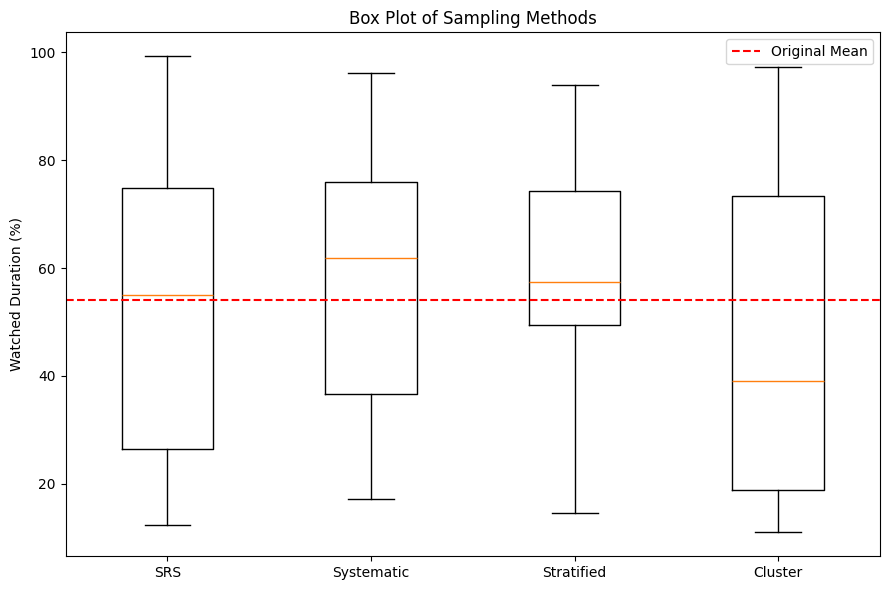

In [ ]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt


data = pd.read_csv("movie.csv")


def SRS(data,n):
    sample=[]
    used_indices=set()
    
    while(len(sample)<n):
        idx = random.randint(0 , len(data)-1)
        if idx not in used_indices:
            sample.append(data.iloc[idx])       
            used_indices.add(idx)
            
    return pd.DataFrame(sample).reset_index(drop=True)

def systematic_sampling(data, n):
    k = math.floor(len(data) / n)
    sample_indices = list(range(0, len(data), k))[:n]
    return data.iloc[sample_indices]

def stratified_sampling(data, stratify_col, n):
    groups = data.groupby(stratify_col)
    sample = groups.apply(lambda x: x.sample(
        max(1, int(n * len(x) / len(data))), replace=False
    ))
    return sample.reset_index(drop=True)

def cluster_sampling(data, cluster_col, num_clusters_to_pick):
    clusters = list(data[cluster_col].unique())
    selected = random.sample(clusters, num_clusters_to_pick)
    cluster_data = data[data[cluster_col].isin(selected)]
    return cluster_data.sample(20, random_state=42)


SRS_sample = SRS(data, 20)
systematic_sample = systematic_sampling(data, 20)
stratified_sample = stratified_sampling(data, "genre", 20)
cluster_sample = cluster_sampling(data, "language", 2)

col = "watched_duration_pct"


original_mean = data[col].mean()


def get_analysis(sample):
    sample_mean = sample[col].mean()
    abs_error = abs(original_mean - sample_mean)
    pct_error = (abs_error / original_mean) * 100
    return sample_mean, abs_error, pct_error

methods = {
    "SRS": SRS_sample,
    "Systematic": systematic_sample,
    "Stratified": stratified_sample,
    "Cluster": cluster_sample
}

analysis_rows = []

for name, sample in methods.items():
    sm, ae, pe = get_analysis(sample)
    analysis_rows.append([name, sm, ae, pe])

analysis_df = pd.DataFrame(analysis_rows,
        columns=["Method", "Sample Mean", "Absolute Error", "Percentage Error"])

print("COMPARISON TABLE")
print(analysis_df)


plt.figure(figsize=(9,6))
plt.boxplot(
    [SRS_sample[col], systematic_sample[col], stratified_sample[col], cluster_sample[col]],
    labels=["SRS", "Systematic", "Stratified", "Cluster"]
)

plt.axhline(original_mean, color="red", linestyle="--", label="Original Mean")
plt.title("Box Plot of Sampling Methods")
plt.ylabel("Watched Duration (%)")
plt.legend()
plt.tight_layout()
plt.show()
